### Introdução a apredizagem de Máquina 

Pocote básico

Supervised learning
-------------------

* Classification -- existe um conjunto de dados com já classificado para realizadar o treinamento.

* Regression -- Quando a variável objetivo for uma variável continua

Unsupervised learning
---------------------

O dados para treinamento são um conjunto de dados sem um target. O objetivo é descobrir grupos de valores parecidos


[Cross validating](#sec_crossvalidating)
----------------------------------------


Warren McCullock 
Walter Pitts

McCullock-Pitts (MCP) neuron in 1943 *"A Logical Calculus of the Ideas Immanent in Nervous Activity"*


In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

import pandas as pd
# Esta biblioteca é especializada para plotar gráficos estatísticos
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Inspecionando os dados
=====================


In [2]:
iris = datasets.load_iris()
# digits = datasets.load_digits()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
for name in iris.feature_names:
    print(name)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [4]:
print('O shape dos meus dados é: {}'.format(iris.data.shape))
iris.data[:5]

O shape dos meus dados é: (150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y = iris.target_names[iris.target]
y[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [6]:
print('Número de dimensões dos meus dados: {}'.format(iris.data.ndim))
print('Número de dimensões dos meu target é: {}'.format(y.reshape(len(y), 1).ndim))

Número de dimensões dos meus dados: 2
Número de dimensões dos meu target é: 2


In [7]:
# Eu não consigo juntar o meu array porque o número de dimensões dos meus dados não são compatíveis
# np.concatenate((iris.data, y), axis=0)

In [8]:
# Para corrigir o problema acima vou tentar abordagem abaixo
print('Agora o meu número de dimensões é: {}'.format(y.reshape(len(y),1).ndim))

Agora o meu número de dimensões é: 2


In [9]:


# Agora eu consigo concatenar os meu dados
dados = np.concatenate((iris.data, y.reshape((len(y), 1))), axis=1)

cols = iris.feature_names + ['especie']

df = pd.DataFrame(dados, columns= cols)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


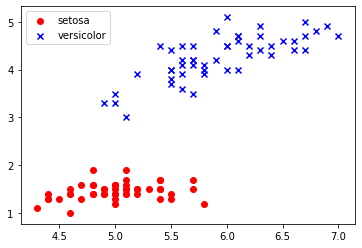

In [10]:
X = iris.data[:100, [0, 2]]
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.legend()

In [13]:
# # iris = sns.load_dataset("iris")
# # iris.head()

# # g = sns.PairGrid(iris, hue="species")
# g = sns.PairGrid(df, hue="especie")
# # g = g.map_diag(plt.hist)
# g = g.map_offdiag(plt.scatter)
# g = g.add_legend()

Separando os dados
-----------------

Em treinamento e teste
    

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.33, random_state=42)

Treinando o meu estimador
=========================

In [31]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', random_state=1)


clf.fit(X_train, y_train)

C:\Users\alex_\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
svm.SVC?

Init signature:
svm.SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`sklearn.linear_model.LinearSVC` or
:class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative docume

Utilizando o meu kernel para realizar previsões
-------------

In [32]:
accuracy_score(y_test, clf.predict(X_test))

1.0

In [33]:
print(clf.predict(X_test)[:5])
print(y_test[:5])

[1 0 2 1 1]
[1 0 2 1 1]


Salvando o modelo
=================

In [ ]:
from joblib import dump, load
dump(clf, 'filename.joblib')
clf2 = load('filename.joblib') 
clf2.predict(X[0:1])

<a id='sec_crossvalidating'> Cross validating</a>
-------------------------------------------------

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import datasets

iris = datasets.load_iris()

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores   

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape